# Super Mario Party Analysis Report

This report provides an analysis of Super Mario Party data to help guide character selection.

## Table of Contents

- [Summary](#summary)
- [Setup](#setup)
- [Average Spaces Moved](#avg-spaces-moved)
- [Average Coins Earned](#avg-coins-earned)
- [Spaces Moved Distribution](#spaces-moved-distribution)
- [Conclusion](#conclusion)

<a id='summary'></a>
## Summary

We can figure out the **expected value** of spaces moved for each character over a number of turn schemes using our stats knowledge (as presented in the `README.md` of this repo).

We scraped data for each character's dice block from [this website](https://miketendo64.com/2018/10/08/super-mario-party-character-dice-guide/). 

In this data set, a `c` character in a `die_side_i` column represent a coin roll (opposed to regular space roll).

We will compute the **expected value** of spaces moved and coins earned off of rolls for each character for games of 10, 15, 20, and 25 turns.

<a id='setup'></a>
## Setup

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv("super_mario_party_characters_and_dice.csv")

# Preview the data
data.head()

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6
0,Mario,1,3,3,3,5,6
1,Luigi,1,1,1,5,6,7
2,Peach,0,2,4,4,4,6
3,Daisy,3,3,3,3,4,4
4,Wario,-2c,-2c,6,6,6,6


<a id='avg-spaces-moved'></a>
## Average Spaces Moved

The expected number of spaces moved over a set of n rolls is 

$\mathbf{E}[nX] = n\mathbf{E}[X]$ = $n\sum \frac{1}{6} * n$, $\forall n \in \{n_1, n_2, n_3, n_4, n_5, n_6\}$

where `n` is the number of rolls. Since you do not move any spaces when you roll a coin outcome, we will have to encode this as 0.

In [47]:
# Replace coin rolls with 0 and make all columns numeric
roll_columns = [x for x in data.columns if "die_side_" in x]
spaces_moved_df = data.copy()
spaces_moved_df[roll_columns] = spaces_moved_df[roll_columns].replace(regex=r'c', value=0).apply(pd.to_numeric)

# Preview changes to the data
spaces_moved_df.head()

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6
0,Mario,1,3,3,3,5,6
1,Luigi,1,1,1,5,6,7
2,Peach,0,2,4,4,4,6
3,Daisy,3,3,3,3,4,4
4,Wario,0,0,6,6,6,6


In [48]:
# Get the expected value of each roll
spaces_moved_df["expected_spaces_value"] = spaces_moved_df.sum(axis=1, numeric_only=True) / 6

# Compute the expected number of spaces under different turn amounts
turns = [10, 15, 20, 25]
for i in turns:
    spaces_moved_df[f"expected_spaces_{i}_turns"] = spaces_moved_df["expected_spaces_value"] * i

print(f"Expected Spaces Moved Per Character (Highest to Lowest)")

# Show the results
display(spaces_moved_df.sort_values(by="expected_spaces_value", ascending=False).reset_index(drop=True))

Expected Spaces Moved Per Character (Highest to Lowest)


,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6,expected_spaces_value,expected_spaces_10_turns,expected_spaces_15_turns,expected_spaces_20_turns,expected_spaces_25_turns
0,Bowser,0,0,1,8,9,10,4.666667,46.666667,70.0,93.333333,116.666667
1,Boo,0,0,5,5,7,7,4.000000,40.000000,60.0,80.000000,100.000000
2,Wario,0,0,6,6,6,6,4.000000,40.000000,60.0,80.000000,100.000000
3,Mario,1,3,3,3,5,6,3.500000,35.000000,52.5,70.000000,87.500000
4,Dry Bones,1,1,1,6,6,6,3.500000,35.000000,52.5,70.000000,87.500000
5,Waluigi,0,1,3,5,5,7,3.500000,35.000000,52.5,70.000000,87.500000
6,Yoshi,0,1,3,5,5,7,3.500000,35.000000,52.5,70.000000,87.500000
7,Diddy Kong,0,0,0,7,7,7,3.500000,35.000000,52.5,70.000000,87.500000
8,Luigi,1,1,1,5,6,7,3.500000,35.000000,52.5,70.000000,87.500000
9,Koopa Troopa,1,1,2,3,3,10,3.333333,33.333333,50.0,66.666667,83.333333


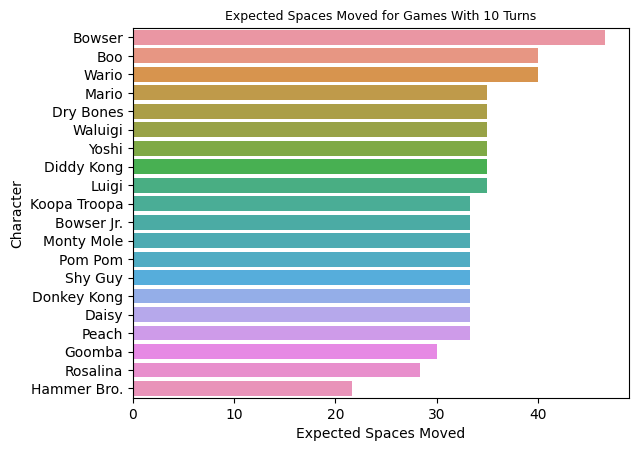

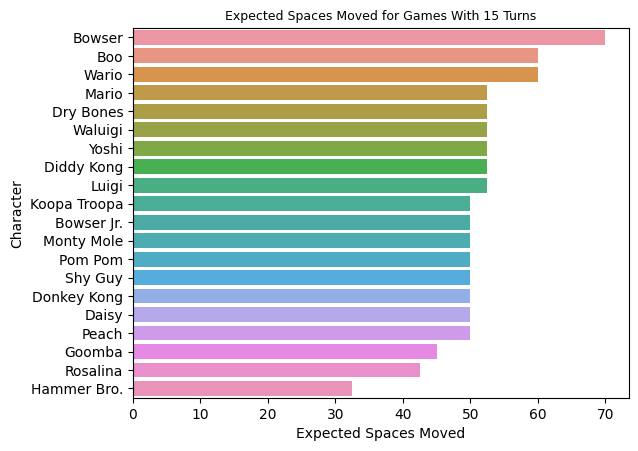

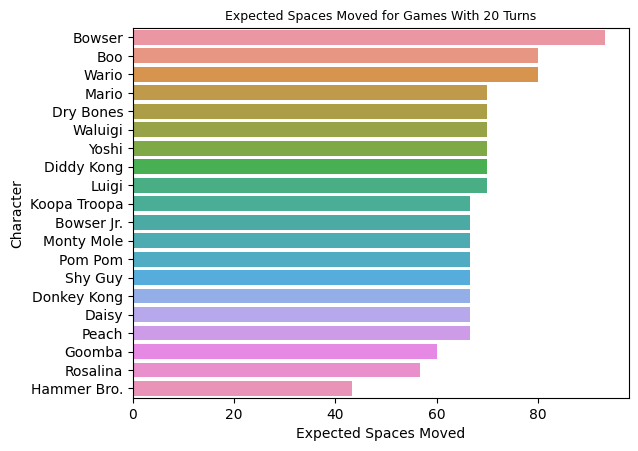

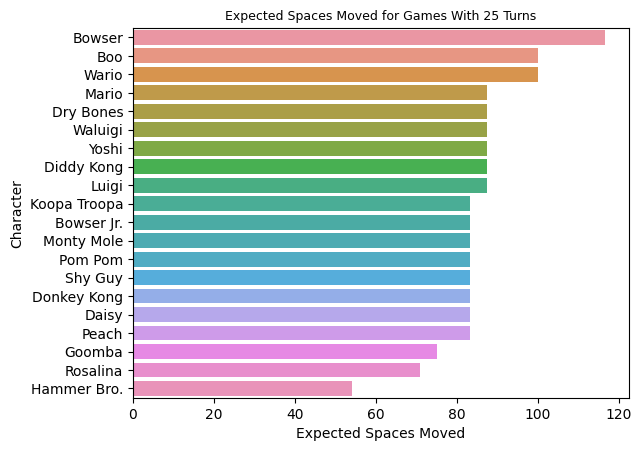

In [50]:
# Plot the results
desc_order = spaces_moved_df.sort_values(by=["expected_spaces_value"], ascending=False)["character"]
for i in turns:
    sns.barplot(data=spaces_moved_df, y="character", x=f"expected_spaces_{i}_turns", order=desc_order)
    plt.title(f"Expected Spaces Moved for Games With {i} Turns", fontsize=9)
    plt.xlabel("Expected Spaces Moved")
    plt.ylabel("Character")
    plt.show()

<a id='avg-coins-earned'></a>
## Average Coins Earned

TODO

<a id='spaces-moved-distribution'></a>
## Spaces Moved Distribution

TODO Variance

<a id='conclusion'></a>
## Conclusion

Provide a conclusion and summary of the findings.
